In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   

In [ ]:
df = pd.read_csv('iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

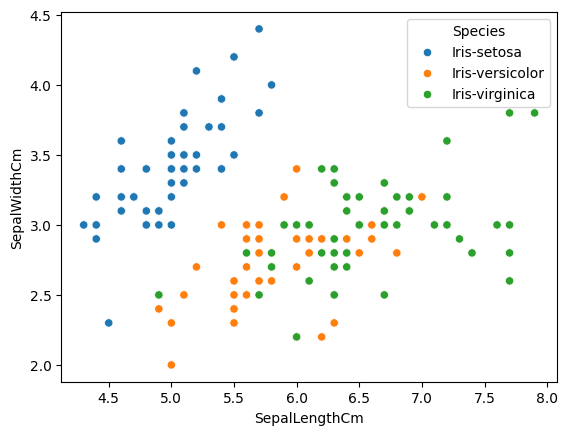

In [7]:
sns.scatterplot(data=df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue='Species')

In [9]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

x = df.drop("Species", axis = 1)
y = df["Species"]

In [10]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x,y_encoded, test_size= 0.2, random_state=42)

In [15]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [16]:
X_train.shape

(120, 5)

In [17]:
X_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4
31,32,5.4,3.4,1.5,0.4
64,65,5.6,2.9,3.6,1.3
141,142,6.9,3.1,5.1,2.3
68,69,6.2,2.2,4.5,1.5
82,83,5.8,2.7,3.9,1.2


In [18]:
X_test.shape

(30, 5)

In [19]:
#feature Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
X_train_scaled

array([[-1.21030717, -1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-1.37240188, -0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [-0.21458252,  1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.46502743, -1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-0.74717943, -1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 1.66108484,  0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [-0.53877194,  0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-1.09452523, -0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-1.62712214, -0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.9787433 , -0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [ 1.56845929, -0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.24854522,  0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 0.27170161,  1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-1.34924549, -0.49876152,  1.8

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled

array([[-0.02933142,  0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-1.30293272, -0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 1.012706  ,  2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.08645051,  0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 0.04013774,  1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-1.00189969, -0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.23773891, -0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.5453029 ,  1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [-0.14511336,  0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [ 0.17907606, -0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.8274549 ,  0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.44187104, -1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.88611775, -0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.5113402 , -1.10824606,  0.0

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [24]:
p = model.predict(X_test_scaled)
p

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [25]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
cm = confusion_matrix(p,y_test)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])